# HMC with Pytorch

In [40]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from src.hmc_pytorch import hmc

In [19]:
def f(x, a=1, b=100):
    """
    Rosenbrock function (Banana function)
    """
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

In [38]:
num_samples = 1000
L = 50
step_size = 1e-3
x_init = np.array([-2, -1])

samples = hmc(x_init, f, num_samples, step_size=step_size, n_steps=L, mass=10)
samples = np.array(samples)


/tmp/ipykernel_3121/3774218833.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  samples = np.array(samples)


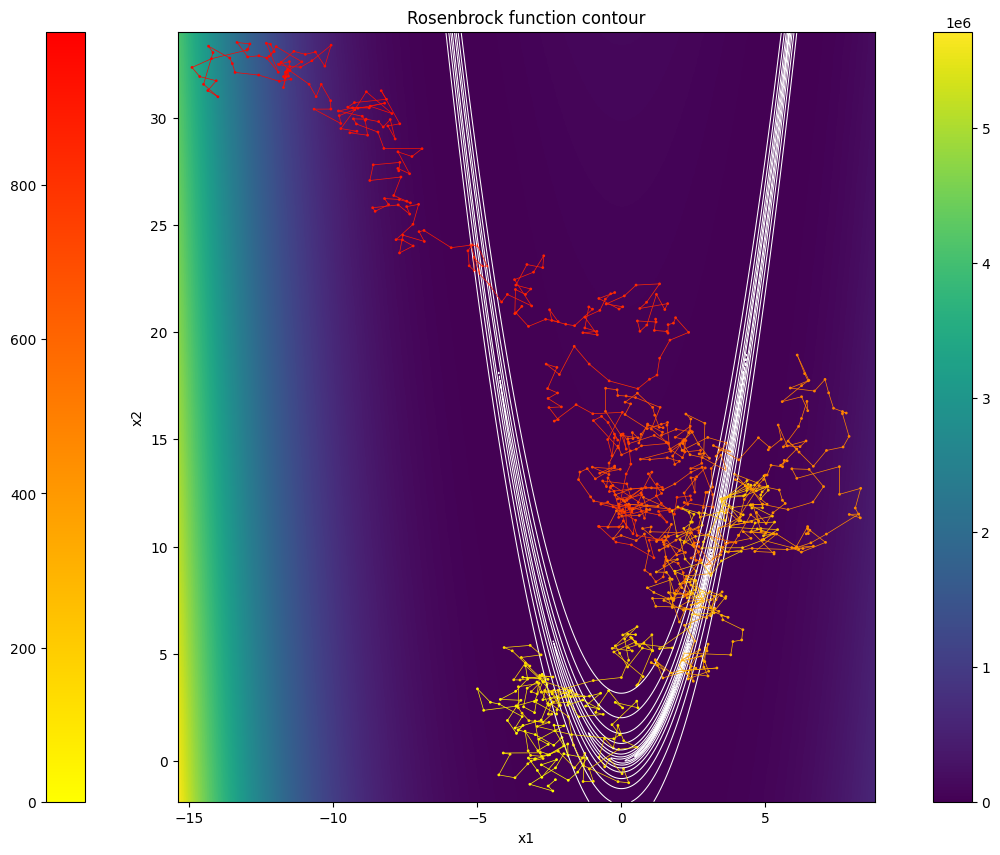

In [39]:

# plot contour of f
plt.figure(figsize=(15, 10))
# x_space, y_space = np.meshgrid(np.linspace(-2, 2, 1000), np.linspace(-1, 3, 1000))
x_min, x_max = np.min(samples[:, 0]), np.max(samples[:, 0])
y_min, y_max = np.min(samples[:, 1]), np.max(samples[:, 1])
x_space, y_space = np.meshgrid(np.linspace(x_min-0.5, x_max+0.5, 1000), np.linspace(y_min-0.5, y_max+0.5, 1000))
Z_small = (1 - x_space)**2 + 100 * (y_space - x_space**2)**2
plt.contour(x_space, y_space, Z_small, levels=np.logspace(-0.5, 3, 10), colors='white', linewidths=0.75)
plt.imshow(
    Z_small,
    extent=[x_space.min(), x_space.max(), y_space.min(), y_space.max()],
    origin='lower',
    cmap='viridis',
    interpolation='nearest',
    aspect='auto'
)
plt.colorbar()
plt.scatter(
    samples[:, 0],
    samples[:, 1],
    c=np.arange(len(samples)),  # color by sample index
    s=1,  # point size
    alpha=1,  # transparency
    cmap='autumn_r'
)
# Plot the samples trajectory with a linecollection with the same colormap
points = samples.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap='autumn_r', norm=plt.Normalize(0, len(samples)))
lc.set_array(np.arange(len(samples)-1))
lc.set_linewidth(0.5)
plt.gca().add_collection(lc)

plt.colorbar(orientation='vertical', location='left')
plt.title('Rosenbrock function contour')
plt.xlabel('x1')
plt.ylabel('x2')
# plt.axis('equal')
plt.show()